Outlines :
1. Importing libraries and data
2. Missing values imputation(data preprocessing)
3. EDA
4. Feature Engineering
5. Model Building
6. Model evaluation


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv(r'C:\Users\aryan\Desktop\DataSets-master\glass.csv')

In [3]:
data.head(2)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [4]:
#data = data[data.columns].apply(lambda x :x.astype(float))

In [5]:
data.rename(columns={'RI':'Ref_index'},inplace=True)

In [6]:
data.head(2)

,Id,Ref_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [7]:
data.isnull().sum()

Id               0
Ref_index        0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

<AxesSubplot:xlabel='Type of glass', ylabel='count'>

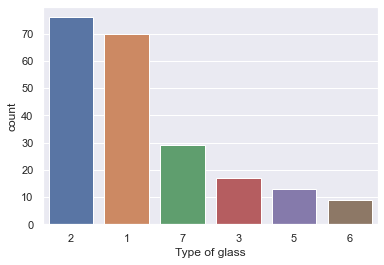

In [8]:
sns.countplot(data['Type of glass'],order=data['Type of glass'].value_counts().index)

In [9]:
# There is no need to clean the features of the data 

In [10]:
# proceed with scaling and fitting 

In [11]:
data.drop(columns=['Id'],inplace=True,axis=1)


In [12]:
data.head(2)

,Ref_index,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
train,test = train_test_split(data,train_size=0.7,random_state=42)

In [16]:
y_train = train.pop('Type of glass')
x_train = train

In [17]:
y_test = test.pop('Type of glass')
x_test = test

In [18]:
scaler = StandardScaler()

In [19]:
x_train[x_train.columns] = scaler.fit_transform(x_train[x_train.columns])

In [20]:
x_test[x_test.columns] = scaler.fit_transform(x_test[x_test.columns])

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [23]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
model.score(x_train,y_train)

0.7583892617449665

In [25]:
y_pred = model.predict(x_test)

In [26]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.6716508385532431

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.6461538461538462